In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

DATADIR = "D:/Datasets/Processed Images/CNN-Datasets"

CATEGORIES = ["Correction Tape", "Eraser", "File", "Glue", "Pen", "Pencil", 
              "Pencil Case", "Ruler", "Scissor", "Stapler"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)  # create path to Correction Tape, Eraser and the rest
    for img in os.listdir(path):  # iterate over each image per Correction Tape, Eraser and the rest
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  
        break
    break

<Figure size 640x480 with 1 Axes>

In [ ]:
print(img_array)

[[167 168 169 ... 141 141 142]
 [167 169 169 ... 141 141 142]
 [168 169 169 ... 142 141 143]
 ...
 [153 153 152 ... 110 109 109]
 [153 153 152 ... 111 110 110]
 [152 152 151 ... 110 111 110]]


In [ ]:
print(img_array.shape)

(1990, 1784)


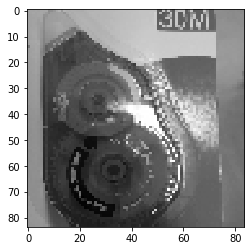

In [ ]:
IMG_SIZE = 84

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Resize the image into 84 x 84
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [ ]:
def create_Dataset():
    Dataset = []
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)  # create path to Correction Tape, Eraser and the rest
        class_num = CATEGORIES.index(category) # create label to Correction Tape, Eraser and the rest
        
        for img in tqdm(os.listdir(path)):  # iterate over each image per Correction Tape, Eraser and the rest
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize to normalise data size
                Dataset.append([new_array, class_num])
            except Exception as e:
                pass
    return Dataset

In [ ]:
Dataset = create_Dataset()

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [00:30<00:00, 19.58it/s]


In [ ]:
print(len(Dataset))

6000


In [ ]:
type(Dataset)

list

In [ ]:
X = []
y = []

In [ ]:
for features, label in Dataset:
    X.append(features)
    y.append(label)

import random
from random import shuffle
a = list(zip(X, y))
random.shuffle(a)

X, y = zip(*a)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid = X_train_full[-5000:], X_train_full[:-5000]
y_train, y_valid = y_train_full[-5000:], y_train_full[:-5000]

print(len(X_train))
print(len(y_train))
print(len(X))
print(len(y))

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

print(len(X_train))
print(len(y_train))
print(len(X))
print(len(y))

5000
5000
6000
6000
5000
5000
6000
6000


In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D 
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, 
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[IMG_SIZE, IMG_SIZE, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", 
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=20, validation_data=[X_valid, y_valid])

model.save("my_model.h5")

Using TensorFlow backend.


Train on 5000 samples, validate on 400 samples
Epoch 1/20
5000/5000 [==============================] - ETA: 6:42 - loss: 2.3028 - accuracy: 0.15 - ETA: 5:23 - loss: 2.4430 - accuracy: 0.12 - ETA: 4:53 - loss: 2.4058 - accuracy: 0.12 - ETA: 4:38 - loss: 2.3867 - accuracy: 0.09 - ETA: 4:29 - loss: 2.3710 - accuracy: 0.08 - ETA: 4:22 - loss: 2.3627 - accuracy: 0.08 - ETA: 4:24 - loss: 2.3544 - accuracy: 0.08 - ETA: 4:24 - loss: 2.3480 - accuracy: 0.09 - ETA: 4:21 - loss: 2.3428 - accuracy: 0.09 - ETA: 4:16 - loss: 2.3381 - accuracy: 0.10 - ETA: 4:12 - loss: 2.3344 - accuracy: 0.10 - ETA: 4:08 - loss: 2.3331 - accuracy: 0.10 - ETA: 4:05 - loss: 2.3305 - accuracy: 0.10 - ETA: 4:02 - loss: 2.3280 - accuracy: 0.10 - ETA: 3:59 - loss: 2.3253 - accuracy: 0.10 - ETA: 3:57 - loss: 2.3220 - accuracy: 0.10 - ETA: 3:56 - loss: 2.3210 - accuracy: 0.11 - ETA: 3:55 - loss: 2.3206 - accuracy: 0.11 - ETA: 3:54 - loss: 2.3169 - accuracy: 0.11 - ETA: 3:54 - loss: 2.3162 - accuracy: 0.11 - ETA: 3:52 - loss:

5000/5000 [==============================] - ETA: 4:35 - loss: 1.5468 - accuracy: 0.37 - ETA: 4:33 - loss: 1.6051 - accuracy: 0.42 - ETA: 4:30 - loss: 1.6170 - accuracy: 0.42 - ETA: 4:28 - loss: 1.5797 - accuracy: 0.46 - ETA: 4:27 - loss: 1.5513 - accuracy: 0.47 - ETA: 4:25 - loss: 1.5428 - accuracy: 0.46 - ETA: 4:23 - loss: 1.5634 - accuracy: 0.46 - ETA: 4:21 - loss: 1.5854 - accuracy: 0.44 - ETA: 4:20 - loss: 1.5823 - accuracy: 0.45 - ETA: 4:18 - loss: 1.6070 - accuracy: 0.45 - ETA: 4:18 - loss: 1.6468 - accuracy: 0.44 - ETA: 4:19 - loss: 1.6491 - accuracy: 0.44 - ETA: 4:18 - loss: 1.6442 - accuracy: 0.43 - ETA: 4:17 - loss: 1.6365 - accuracy: 0.43 - ETA: 4:20 - loss: 1.6366 - accuracy: 0.44 - ETA: 4:22 - loss: 1.6326 - accuracy: 0.44 - ETA: 4:21 - loss: 1.6112 - accuracy: 0.45 - ETA: 4:20 - loss: 1.6188 - accuracy: 0.44 - ETA: 4:19 - loss: 1.6317 - accuracy: 0.42 - ETA: 4:20 - loss: 1.6336 - accuracy: 0.42 - ETA: 4:23 - loss: 1.6233 - accuracy: 0.43 - ETA: 4:25 - loss: 1.6096 - accu

5000/5000 [==============================] - ETA: 4:35 - loss: 1.2006 - accuracy: 0.40 - ETA: 4:32 - loss: 1.5301 - accuracy: 0.37 - ETA: 4:31 - loss: 1.6732 - accuracy: 0.34 - ETA: 4:30 - loss: 1.5538 - accuracy: 0.39 - ETA: 4:27 - loss: 1.5058 - accuracy: 0.44 - ETA: 4:25 - loss: 1.4292 - accuracy: 0.47 - ETA: 4:24 - loss: 1.3884 - accuracy: 0.50 - ETA: 4:22 - loss: 1.3519 - accuracy: 0.50 - ETA: 4:21 - loss: 1.3518 - accuracy: 0.50 - ETA: 4:19 - loss: 1.3250 - accuracy: 0.51 - ETA: 4:19 - loss: 1.3271 - accuracy: 0.50 - ETA: 4:17 - loss: 1.3074 - accuracy: 0.51 - ETA: 4:15 - loss: 1.2620 - accuracy: 0.53 - ETA: 4:13 - loss: 1.2525 - accuracy: 0.53 - ETA: 4:12 - loss: 1.2329 - accuracy: 0.54 - ETA: 4:10 - loss: 1.2193 - accuracy: 0.54 - ETA: 4:08 - loss: 1.2352 - accuracy: 0.54 - ETA: 4:06 - loss: 1.2336 - accuracy: 0.54 - ETA: 4:04 - loss: 1.2346 - accuracy: 0.54 - ETA: 4:03 - loss: 1.2260 - accuracy: 0.54 - ETA: 4:01 - loss: 1.2318 - accuracy: 0.54 - ETA: 3:59 - loss: 1.2431 - accu

5000/5000 [==============================] - ETA: 4:34 - loss: 0.8352 - accuracy: 0.71 - ETA: 4:29 - loss: 0.7884 - accuracy: 0.75 - ETA: 4:27 - loss: 0.8225 - accuracy: 0.71 - ETA: 4:26 - loss: 0.7613 - accuracy: 0.71 - ETA: 4:24 - loss: 0.7965 - accuracy: 0.71 - ETA: 4:22 - loss: 0.7845 - accuracy: 0.71 - ETA: 4:21 - loss: 0.8304 - accuracy: 0.68 - ETA: 4:19 - loss: 0.8597 - accuracy: 0.67 - ETA: 4:18 - loss: 0.8735 - accuracy: 0.68 - ETA: 4:16 - loss: 0.8787 - accuracy: 0.68 - ETA: 4:14 - loss: 0.8984 - accuracy: 0.66 - ETA: 4:12 - loss: 0.9008 - accuracy: 0.66 - ETA: 4:11 - loss: 0.9011 - accuracy: 0.66 - ETA: 4:09 - loss: 0.8964 - accuracy: 0.66 - ETA: 4:07 - loss: 0.8973 - accuracy: 0.67 - ETA: 4:05 - loss: 0.8994 - accuracy: 0.66 - ETA: 4:04 - loss: 0.8872 - accuracy: 0.66 - ETA: 4:02 - loss: 0.8859 - accuracy: 0.65 - ETA: 4:00 - loss: 0.8895 - accuracy: 0.66 - ETA: 3:58 - loss: 0.8879 - accuracy: 0.66 - ETA: 3:57 - loss: 0.8872 - accuracy: 0.66 - ETA: 3:55 - loss: 0.8730 - accu

5000/5000 [==============================] - ETA: 4:36 - loss: 0.7624 - accuracy: 0.75 - ETA: 4:33 - loss: 0.6952 - accuracy: 0.76 - ETA: 4:31 - loss: 0.7019 - accuracy: 0.76 - ETA: 4:28 - loss: 0.7164 - accuracy: 0.72 - ETA: 4:27 - loss: 0.7260 - accuracy: 0.73 - ETA: 4:25 - loss: 0.7261 - accuracy: 0.71 - ETA: 4:23 - loss: 0.7093 - accuracy: 0.71 - ETA: 4:21 - loss: 0.7230 - accuracy: 0.71 - ETA: 4:19 - loss: 0.7473 - accuracy: 0.71 - ETA: 4:18 - loss: 0.7353 - accuracy: 0.71 - ETA: 4:17 - loss: 0.7192 - accuracy: 0.72 - ETA: 4:15 - loss: 0.7022 - accuracy: 0.73 - ETA: 4:13 - loss: 0.7491 - accuracy: 0.72 - ETA: 4:12 - loss: 0.7563 - accuracy: 0.72 - ETA: 4:10 - loss: 0.7669 - accuracy: 0.72 - ETA: 4:08 - loss: 0.7563 - accuracy: 0.73 - ETA: 4:06 - loss: 0.7573 - accuracy: 0.73 - ETA: 4:04 - loss: 0.7517 - accuracy: 0.73 - ETA: 4:02 - loss: 0.7407 - accuracy: 0.73 - ETA: 4:01 - loss: 0.7416 - accuracy: 0.73 - ETA: 4:00 - loss: 0.7407 - accuracy: 0.73 - ETA: 3:58 - loss: 0.7323 - accu

5000/5000 [==============================] - ETA: 4:37 - loss: 0.7814 - accuracy: 0.68 - ETA: 4:34 - loss: 0.7065 - accuracy: 0.76 - ETA: 4:32 - loss: 0.6561 - accuracy: 0.78 - ETA: 4:30 - loss: 0.6040 - accuracy: 0.79 - ETA: 4:28 - loss: 0.5825 - accuracy: 0.80 - ETA: 4:26 - loss: 0.5840 - accuracy: 0.80 - ETA: 4:24 - loss: 0.6231 - accuracy: 0.79 - ETA: 4:22 - loss: 0.5957 - accuracy: 0.81 - ETA: 4:20 - loss: 0.5883 - accuracy: 0.81 - ETA: 4:18 - loss: 0.5951 - accuracy: 0.81 - ETA: 4:17 - loss: 0.6021 - accuracy: 0.80 - ETA: 4:15 - loss: 0.6047 - accuracy: 0.80 - ETA: 4:13 - loss: 0.6097 - accuracy: 0.79 - ETA: 4:11 - loss: 0.6007 - accuracy: 0.80 - ETA: 4:09 - loss: 0.5816 - accuracy: 0.81 - ETA: 4:08 - loss: 0.5809 - accuracy: 0.81 - ETA: 4:06 - loss: 0.6364 - accuracy: 0.79 - ETA: 4:04 - loss: 0.6358 - accuracy: 0.80 - ETA: 4:03 - loss: 0.6281 - accuracy: 0.80 - ETA: 4:01 - loss: 0.6328 - accuracy: 0.80 - ETA: 3:59 - loss: 0.6324 - accuracy: 0.81 - ETA: 3:58 - loss: 0.6188 - accu

5000/5000 [==============================] - ETA: 5:01 - loss: 0.4887 - accuracy: 0.87 - ETA: 4:53 - loss: 0.3808 - accuracy: 0.89 - ETA: 4:44 - loss: 0.4168 - accuracy: 0.86 - ETA: 4:39 - loss: 0.3959 - accuracy: 0.85 - ETA: 4:36 - loss: 0.3775 - accuracy: 0.86 - ETA: 4:33 - loss: 0.3589 - accuracy: 0.87 - ETA: 4:30 - loss: 0.3346 - accuracy: 0.88 - ETA: 4:27 - loss: 0.3470 - accuracy: 0.87 - ETA: 4:25 - loss: 0.3680 - accuracy: 0.86 - ETA: 4:23 - loss: 0.3823 - accuracy: 0.85 - ETA: 4:20 - loss: 0.3889 - accuracy: 0.85 - ETA: 4:18 - loss: 0.3840 - accuracy: 0.85 - ETA: 4:16 - loss: 0.3810 - accuracy: 0.85 - ETA: 4:15 - loss: 0.3853 - accuracy: 0.85 - ETA: 4:13 - loss: 0.3725 - accuracy: 0.85 - ETA: 4:11 - loss: 0.3860 - accuracy: 0.85 - ETA: 4:09 - loss: 0.3814 - accuracy: 0.85 - ETA: 4:07 - loss: 0.4129 - accuracy: 0.84 - ETA: 4:05 - loss: 0.4133 - accuracy: 0.84 - ETA: 4:03 - loss: 0.4104 - accuracy: 0.84 - ETA: 4:01 - loss: 0.4110 - accuracy: 0.84 - ETA: 3:59 - loss: 0.4047 - accu

5000/5000 [==============================] - ETA: 4:35 - loss: 0.3851 - accuracy: 0.84 - ETA: 4:33 - loss: 0.3965 - accuracy: 0.84 - ETA: 4:32 - loss: 0.4016 - accuracy: 0.84 - ETA: 4:29 - loss: 0.4106 - accuracy: 0.86 - ETA: 4:26 - loss: 0.3875 - accuracy: 0.86 - ETA: 4:25 - loss: 0.4109 - accuracy: 0.85 - ETA: 4:23 - loss: 0.4243 - accuracy: 0.84 - ETA: 4:21 - loss: 0.4171 - accuracy: 0.84 - ETA: 4:19 - loss: 0.3981 - accuracy: 0.85 - ETA: 4:17 - loss: 0.3809 - accuracy: 0.86 - ETA: 4:15 - loss: 0.3726 - accuracy: 0.86 - ETA: 4:14 - loss: 0.3683 - accuracy: 0.86 - ETA: 4:12 - loss: 0.3620 - accuracy: 0.87 - ETA: 4:10 - loss: 0.3586 - accuracy: 0.87 - ETA: 4:08 - loss: 0.3685 - accuracy: 0.86 - ETA: 4:07 - loss: 0.3620 - accuracy: 0.86 - ETA: 4:05 - loss: 0.3634 - accuracy: 0.86 - ETA: 4:03 - loss: 0.3592 - accuracy: 0.86 - ETA: 4:01 - loss: 0.3511 - accuracy: 0.86 - ETA: 4:00 - loss: 0.3473 - accuracy: 0.87 - ETA: 3:58 - loss: 0.3460 - accuracy: 0.86 - ETA: 3:56 - loss: 0.3486 - accu

5000/5000 [==============================] - ETA: 4:35 - loss: 0.2771 - accuracy: 0.93 - ETA: 4:36 - loss: 0.3477 - accuracy: 0.90 - ETA: 4:31 - loss: 0.3758 - accuracy: 0.88 - ETA: 4:29 - loss: 0.3778 - accuracy: 0.88 - ETA: 4:28 - loss: 0.3862 - accuracy: 0.87 - ETA: 4:25 - loss: 0.3714 - accuracy: 0.86 - ETA: 4:24 - loss: 0.3316 - accuracy: 0.88 - ETA: 4:23 - loss: 0.3116 - accuracy: 0.89 - ETA: 4:21 - loss: 0.3363 - accuracy: 0.88 - ETA: 4:19 - loss: 0.3234 - accuracy: 0.89 - ETA: 4:18 - loss: 0.3189 - accuracy: 0.89 - ETA: 4:17 - loss: 0.3158 - accuracy: 0.89 - ETA: 4:16 - loss: 0.3259 - accuracy: 0.88 - ETA: 4:14 - loss: 0.3281 - accuracy: 0.88 - ETA: 4:14 - loss: 0.3202 - accuracy: 0.88 - ETA: 4:12 - loss: 0.3294 - accuracy: 0.87 - ETA: 4:11 - loss: 0.3237 - accuracy: 0.88 - ETA: 4:09 - loss: 0.3293 - accuracy: 0.88 - ETA: 4:07 - loss: 0.3398 - accuracy: 0.88 - ETA: 4:05 - loss: 0.3381 - accuracy: 0.88 - ETA: 4:03 - loss: 0.3302 - accuracy: 0.88 - ETA: 4:01 - loss: 0.3277 - accu

5000/5000 [==============================] - ETA: 4:31 - loss: 0.3543 - accuracy: 0.90 - ETA: 4:27 - loss: 0.3168 - accuracy: 0.92 - ETA: 4:26 - loss: 0.2897 - accuracy: 0.91 - ETA: 4:24 - loss: 0.2956 - accuracy: 0.91 - ETA: 4:23 - loss: 0.2945 - accuracy: 0.91 - ETA: 4:21 - loss: 0.2907 - accuracy: 0.91 - ETA: 4:20 - loss: 0.2900 - accuracy: 0.90 - ETA: 4:18 - loss: 0.2921 - accuracy: 0.89 - ETA: 4:18 - loss: 0.2927 - accuracy: 0.90 - ETA: 4:16 - loss: 0.2907 - accuracy: 0.90 - ETA: 4:14 - loss: 0.2986 - accuracy: 0.89 - ETA: 4:12 - loss: 0.2803 - accuracy: 0.89 - ETA: 4:10 - loss: 0.2744 - accuracy: 0.90 - ETA: 4:08 - loss: 0.2714 - accuracy: 0.89 - ETA: 4:07 - loss: 0.2942 - accuracy: 0.89 - ETA: 4:05 - loss: 0.2900 - accuracy: 0.89 - ETA: 4:03 - loss: 0.2857 - accuracy: 0.89 - ETA: 4:01 - loss: 0.2778 - accuracy: 0.89 - ETA: 3:59 - loss: 0.2673 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2708 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2721 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2667 - accu

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

600/600 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 9s 15ms/step


In [ ]:
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

Test loss:  0.3977507972717285
Test accuracy:  0.878333330154419


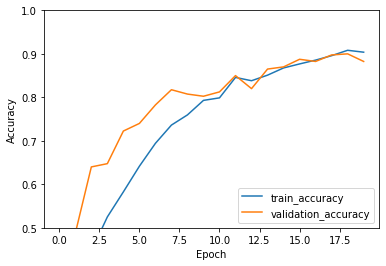

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

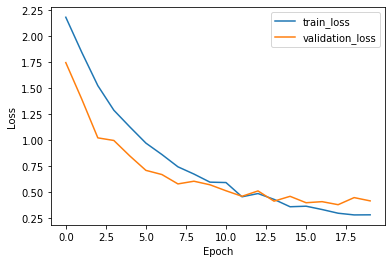

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

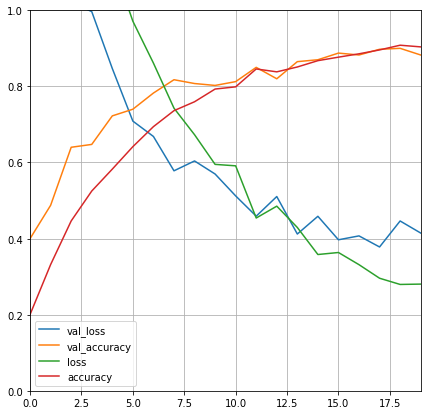

In [ ]:
import pandas as pd 

pd.DataFrame(history.history).plot(figsize=(7,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
predictions = model.predict_classes(X_test)

(10.0, 0.0)

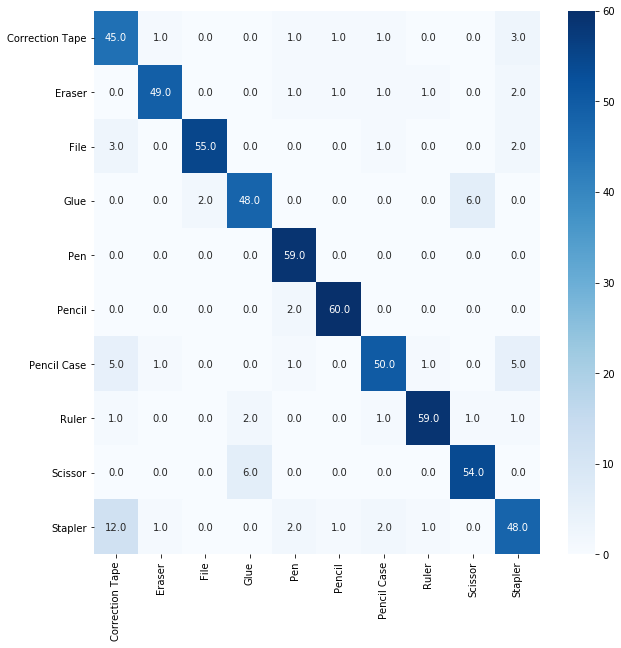

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, predictions)
ax = sns.heatmap(cm,annot=True,cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES, fmt=".1f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76        52
           1       0.94      0.89      0.92        55
           2       0.96      0.90      0.93        61
           3       0.86      0.86      0.86        56
           4       0.89      1.00      0.94        59
           5       0.95      0.97      0.96        62
           6       0.89      0.79      0.84        63
           7       0.95      0.91      0.93        65
           8       0.89      0.90      0.89        60
           9       0.79      0.72      0.75        67

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600

